In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

First step after reading the csv data is to merge them. Following are the merges

X is a train data which is obtained by merging stores.csv, features.csv and train.csv.

y is a test data which is obtained by merging stores.csv, features.csv and test.csv.

In [2]:
feature=pd.read_csv("E:\\Dsight\\walmart\\features.csv")
stores=pd.read_csv("E:\\Dsight\\walmart\\stores.csv")
train=pd.read_csv("E:\\Dsight\\walmart\\train.csv")
test=pd.read_csv("E:\\Dsight\\walmart\\test.csv")

In [3]:
X=pd.merge(stores,pd.merge(feature,train))
y=pd.merge(stores,pd.merge(feature,test))

Imputing mean in place of missing. MarkDown1 to MarkDown5 have missings

In [4]:
X["MarkDown1"]=X["MarkDown1"].fillna(X["MarkDown1"].mean())
X["MarkDown2"]=X["MarkDown2"].fillna(X["MarkDown2"].mean())
X["MarkDown3"]=X["MarkDown3"].fillna(X["MarkDown3"].mean())
X["MarkDown4"]=X["MarkDown4"].fillna(X["MarkDown4"].mean())
X["MarkDown5"]=X["MarkDown5"].fillna(X["MarkDown5"].mean())

The 'Date' variable has to be converted to datetime format.

In [5]:
X["Date"]=pd.to_datetime(X["Date"])


From the Date column day, month, quarter, week of the year and year are extracted. 

In [6]:
X['day'] = X['Date'].dt.day
X['month'] = X['Date'].dt.month
X['quarter'] = X['Date'].dt.quarter
X['week_of_year'] = X['Date'].dt.isocalendar().week
X['year'] = X['Date'].dt.year

Created new column MarkDown_average which is average of all MarkDown columns(1-5) and dropped all the MarkDown columns.

In [7]:
X['MarkDown_average'] = X[["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"]].mean(axis=1)
X = X.drop(columns=["MarkDown1","MarkDown2","MarkDown3","MarkDown4","MarkDown5"])

Converted column IsHoliday which has boolen values to True=1 and False=0 

In [8]:
X.IsHoliday = X.IsHoliday.replace({True: 1, False: 0})

Exploratory Data Analysis

In [9]:
X.describe()

,Store,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,day,month,quarter,week_of_year,year,MarkDown_average
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,136727.915739,60.090059,3.361027,171.201947,7.960289,0.070358,44.260317,15981.258123,15.673131,6.449510,2.482767,25.826762,2010.968591,4006.522707
std,12.785297,60980.583328,18.447931,0.458515,39.159276,1.863296,0.255750,30.492054,22711.183519,8.753549,3.243217,1.071341,14.151887,0.796876,2267.428349
min,1.000000,34875.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,-4988.940000,1.000000,1.000000,1.000000,1.000000,2010.000000,113.470000
25%,11.000000,93638.000000,46.680000,2.933000,132.022667,6.891000,0.000000,18.000000,2079.650000,8.000000,4.000000,2.000000,14.000000,2010.000000,4006.522707
50%,22.000000,140167.000000,62.090000,3.452000,182.318780,7.866000,0.000000,37.000000,7612.030000,16.000000,6.000000,2.000000,26.000000,2011.000000,4006.522707
75%,33.000000,202505.000000,74.280000,3.738000,212.416993,8.572000,0.000000,74.000000,20205.852500,23.000000,9.000000,3.000000,38.000000,2012.000000,4006.522707
max,45.000000,219622.000000,100.140000,4.468000,227.232807,14.313000,1.000000,99.000000,693099.360000,31.000000,12.000000,4.000000,52.000000,2012.000000,32102.122000


Correlation matrix

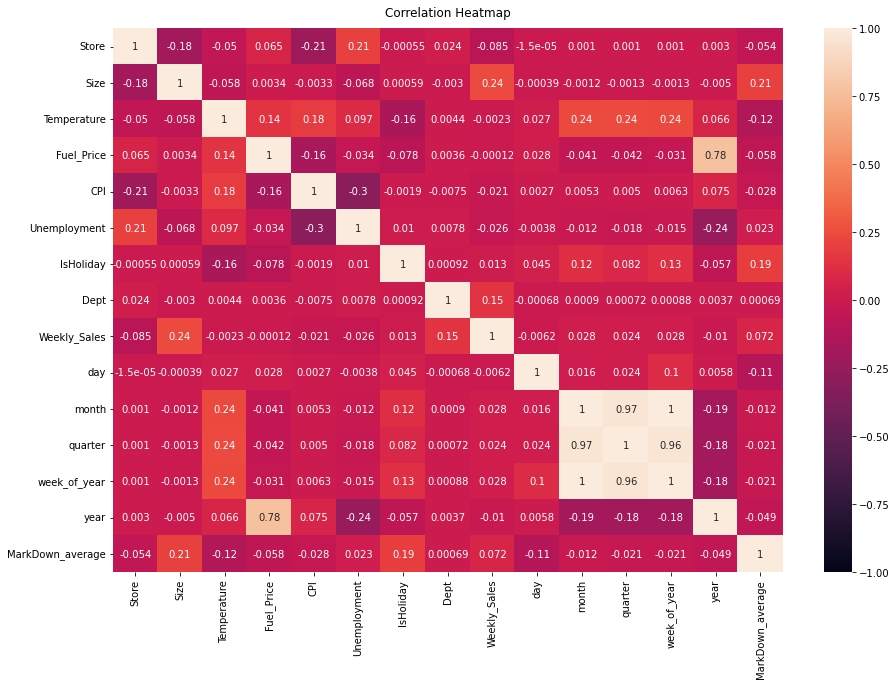

In [10]:
plt.figure(figsize=(15,10))
cor = sns.heatmap(X.corr(),vmin=-1, vmax=1, annot=True) 
cor.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
  
# displaying heatmap 
plt.show() 

Bar plot to check weekly sales with type of stores. Store type A has highest sales and type C has lowest sales

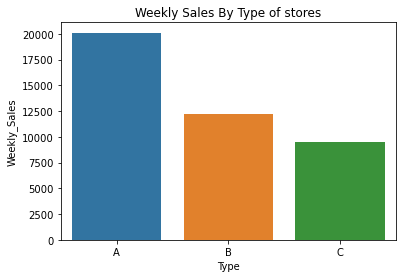

In [11]:
sns.barplot(x = 'Type',
            y = 'Weekly_Sales',
            data = X,errorbar=('ci', 0)).set(title="Weekly Sales By Type of stores")
plt.show()

Bar plot to check the weekly sales by store type on holidays.

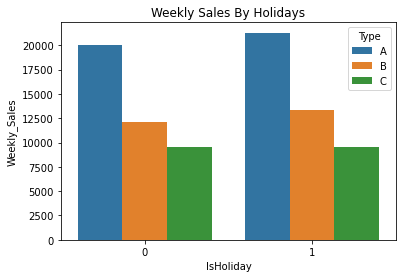

In [12]:
sns.barplot(x = 'IsHoliday',
            y = 'Weekly_Sales',hue="Type",
            data = X,errorbar=('ci', 0)).set(title='Weekly Sales By Holidays')
plt.show()

Bar plot to check is there any difference in sale by year

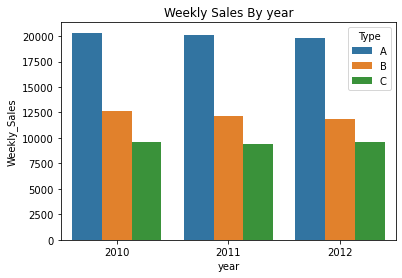

In [13]:
sns.barplot(x = 'year',
            y = 'Weekly_Sales',hue='Type',
            data = X,errorbar=('ci', 0)).set(title='Weekly Sales By year')
plt.show()

Bar plot to check Weekly sales by month

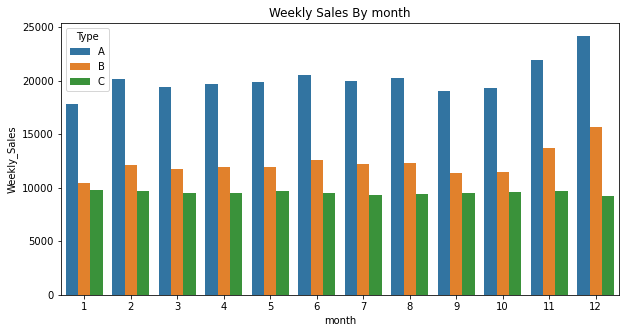

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'month',
            y = 'Weekly_Sales',hue='Type',
            data = X,errorbar=('ci', 0)).set(title='Weekly Sales By month')

plt.show()

line plot to check Weekly sales by month

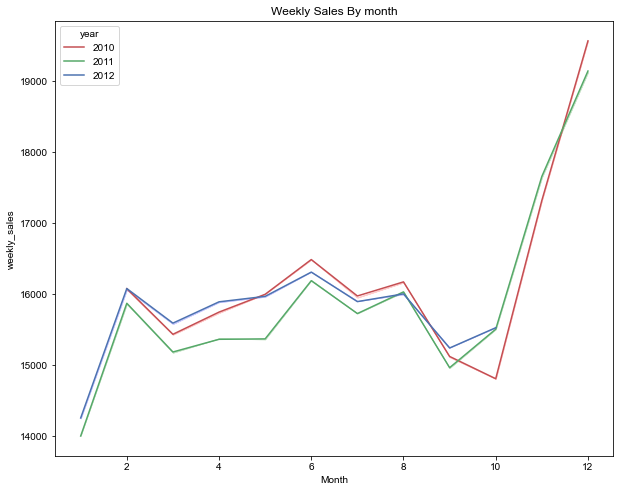

In [15]:
plt.figure(figsize=(10,8))
sns.lineplot(x='month', y='Weekly_Sales', hue='year',data=X,errorbar=('ci', 0),
             palette=['r', 'g','b']).set(title='Weekly Sales By month', xlabel='Month', ylabel='weekly_sales')
sns.set_theme(style='white')

  

Line plot to check Weekly sales by week of the year

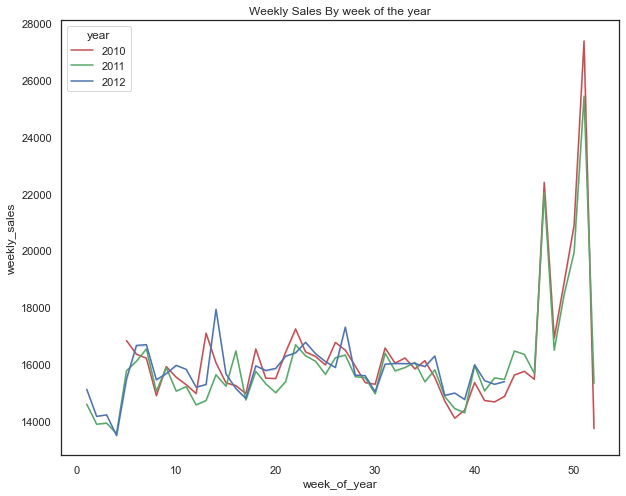

In [16]:
plt.figure(figsize=(10,8))
sns.lineplot(x='week_of_year', y='Weekly_Sales', hue='year',data=X,errorbar=('ci', 0),
             palette=['r', 'g','b']).set(title='Weekly Sales By week of the year', xlabel='week_of_year', ylabel='weekly_sales')
sns.set_theme(style='white')

Scatter plot to check Markdown and weekly sales

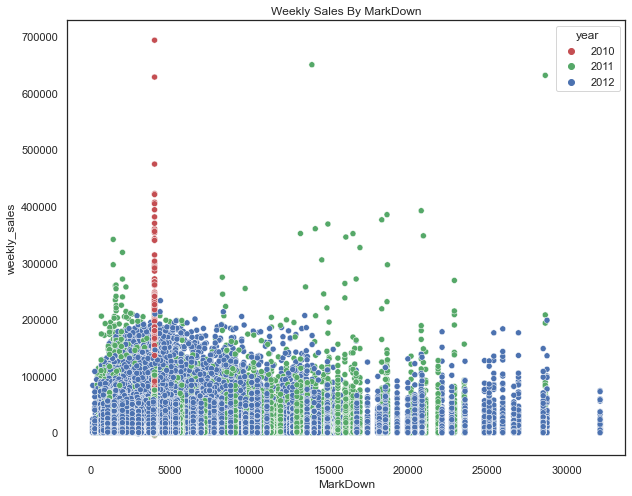

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='MarkDown_average', y='Weekly_Sales', hue='year',data=X,
             palette=['r', 'g','b']).set(title='Weekly Sales By MarkDown', xlabel='MarkDown', ylabel='weekly_sales')
sns.set_theme(style='white')

Scatter plot for Fuel Price and weekly sale

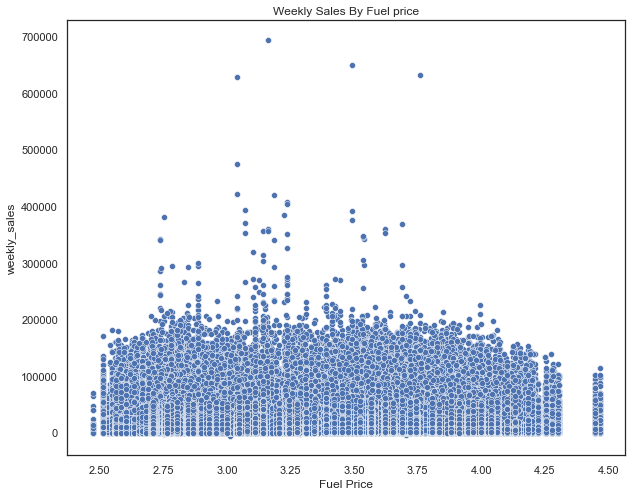

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=X,
             palette=['r', 'g','b']).set(title='Weekly Sales By Fuel price', xlabel='Fuel Price', ylabel='weekly_sales')
sns.set_theme(style='white')

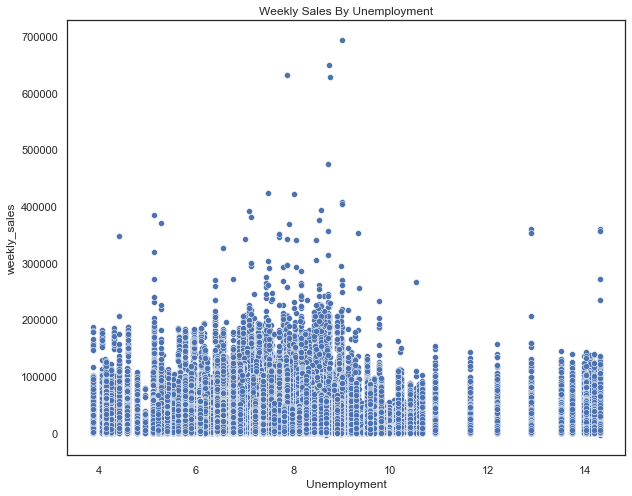

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=X,
             palette=['r', 'g','b']).set(title='Weekly Sales By Unemployment', xlabel='Unemployment', ylabel='weekly_sales')
sns.set_theme(style='white')

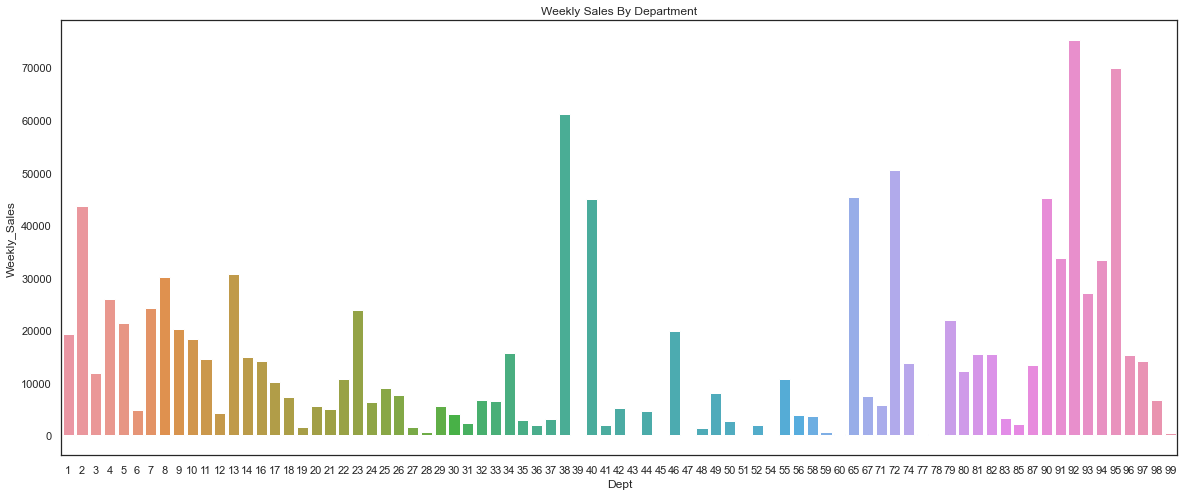

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'Dept',
            y = 'Weekly_Sales',
            data = X,errorbar=('ci', 0)).set(title="Weekly Sales By Department")
plt.show()

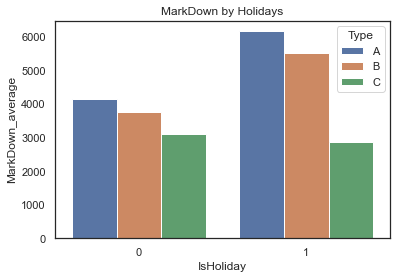

In [21]:
sns.barplot(x = 'IsHoliday',
            y = 'MarkDown_average',hue='Type',
            data = X,errorbar=('ci', 0)).set(title='MarkDown by Holidays')
plt.show()